In [1]:
pip install numpy opencv-python scipy matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            out[i:i+block_size, j:j+block_size] = func(block)
    return out

def simple_jpeg_encoder(input_image):
    """Simple JPEG encoder."""
    # Convert RGB to YCbCr
    ycbcr_image = rgb_to_ycbcr(input_image)
    
    # Split the image into Y, Cb, and Cr components
    Y, Cb, Cr = cv2.split(ycbcr_image)
    
    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Apply DCT and quantization
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        return np.round(dct_block / q_matrix)
    
    Y_quant = block_processing(Y, 8, encode_block)
    Cb_quant = block_processing(Cb, 8, encode_block)
    Cr_quant = block_processing(Cr, 8, encode_block)
    
    return Y_quant, Cb_quant, Cr_quant

def simple_jpeg_decoder(encoded_image):
    """Simple JPEG decoder."""
    Y_quant, Cb_quant, Cr_quant = encoded_image
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Dequantize and apply inverse DCT
    def decode_block(block):
        dequant_block = block * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')
    
    Y = block_processing(Y_quant, 8, decode_block)
    Cb = block_processing(Cb_quant, 8, decode_block)
    Cr = block_processing(Cr_quant, 8, decode_block)
    
    # Upsample Cb and Cr
    Cb = cv2.resize(Cb, (Y.shape[1], Y.shape[0]))
    Cr = cv2.resize(Cr, (Y.shape[1], Y.shape[0]))
    
    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# Load an image
input_image = Image.open("https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg")  # Replace 'input.jpg' with your image file
input_image = np.array(input_image)
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)

# Encode the image
encoded_image = simple_jpeg_encoder(input_image)

# Decode the image
output_image = simple_jpeg_decoder(encoded_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

OSError: [Errno 22] Invalid argument: 'C:\\Users\\Sunilk DSK\\https:\\images.pexels.com\\photos\\1666021\\pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg'

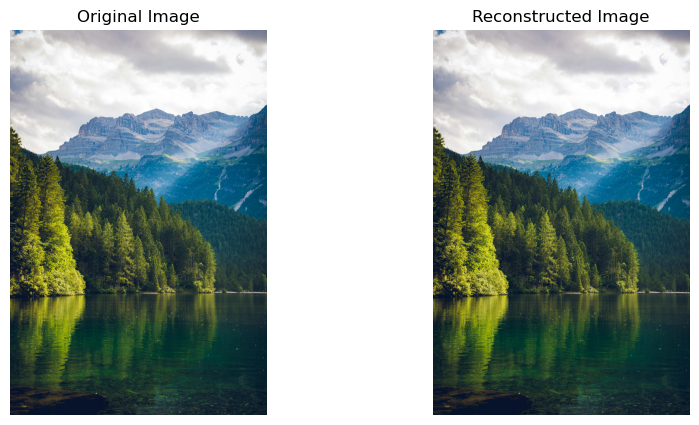

In [1]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def load_image_from_url(url):
    """Load an image from a URL."""
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            out[i:i+block_size, j:j+block_size] = func(block)
    return out

def simple_jpeg_encoder(input_image):
    """Simple JPEG encoder."""
    # Convert RGB to YCbCr
    ycbcr_image = rgb_to_ycbcr(input_image)
    
    # Split the image into Y, Cb, and Cr components
    Y, Cb, Cr = cv2.split(ycbcr_image)
    
    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Apply DCT and quantization
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        return np.round(dct_block / q_matrix)
    
    Y_quant = block_processing(Y, 8, encode_block)
    Cb_quant = block_processing(Cb, 8, encode_block)
    Cr_quant = block_processing(Cr, 8, encode_block)
    
    return Y_quant, Cb_quant, Cr_quant

def simple_jpeg_decoder(encoded_image):
    """Simple JPEG decoder."""
    Y_quant, Cb_quant, Cr_quant = encoded_image
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Dequantize and apply inverse DCT
    def decode_block(block):
        dequant_block = block * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')
    
    Y = block_processing(Y_quant, 8, decode_block)
    Cb = block_processing(Cb_quant, 8, decode_block)
    Cr = block_processing(Cr_quant, 8, decode_block)
    
    # Upsample Cb and Cr
    Cb = cv2.resize(Cb, (Y.shape[1], Y.shape[0]))
    Cr = cv2.resize(Cr, (Y.shape[1], Y.shape[0]))
    
    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# Load an image from a URL
url = "https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg"
input_image = load_image_from_url(url)

# Encode the image
encoded_image = simple_jpeg_encoder(input_image)

# Decode the image
output_image = simple_jpeg_decoder(encoded_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

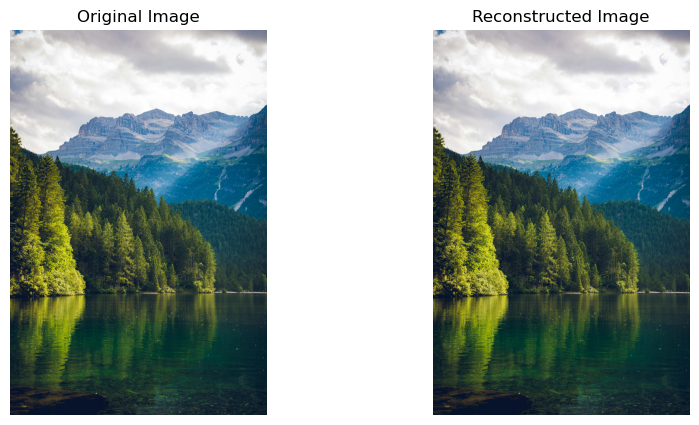

In [3]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def load_image_from_url(url):
    """Load an image from a URL."""
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            out[i:i+block_size, j:j+block_size] = func(block)
    return out

def simple_jpeg_encoder(input_image):
    """Simple JPEG encoder."""
    # Convert RGB to YCbCr
    ycbcr_image = rgb_to_ycbcr(input_image)
    
    # Split the image into Y, Cb, and Cr components
    Y, Cb, Cr = cv2.split(ycbcr_image)
    
    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Apply DCT and quantization
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        return np.round(dct_block / q_matrix)
    
    Y_quant = block_processing(Y, 8, encode_block)
    Cb_quant = block_processing(Cb, 8, encode_block)
    Cr_quant = block_processing(Cr, 8, encode_block)
    
    return Y_quant, Cb_quant, Cr_quant

def simple_jpeg_decoder(encoded_image):
    """Simple JPEG decoder."""
    Y_quant, Cb_quant, Cr_quant = encoded_image
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Dequantize and apply inverse DCT
    def decode_block(block):
        dequant_block = block * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')
    
    Y = block_processing(Y_quant, 8, decode_block)
    Cb = block_processing(Cb_quant, 8, decode_block)
    Cr = block_processing(Cr_quant, 8, decode_block)
    
    # Upsample Cb and Cr
    Cb = cv2.resize(Cb, (Y.shape[1], Y.shape[0]))
    Cr = cv2.resize(Cr, (Y.shape[1], Y.shape[0]))
    
    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# Load an image from a URL
url = "https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg"
input_image = load_image_from_url(url)

# Encode the image
encoded_image = simple_jpeg_encoder(input_image)

# Decode the image
output_image = simple_jpeg_decoder(encoded_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

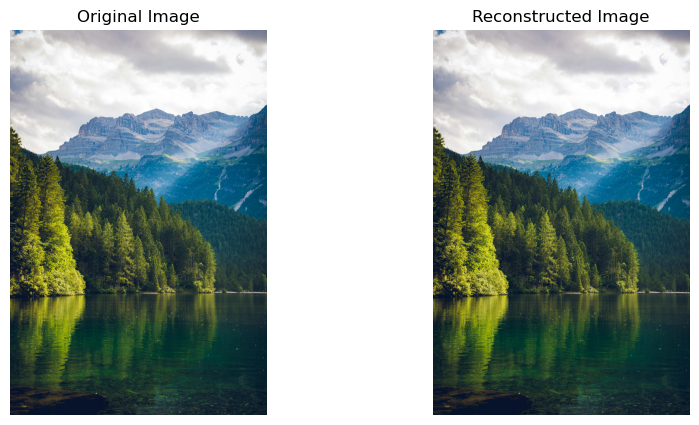

In [2]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def load_image_from_url(url):
    """Load an image from a URL."""
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            out[i:i+block_size, j:j+block_size] = func(block)
    return out

def simple_jpeg_encoder(input_image):
    """Simple JPEG encoder."""
    # Convert RGB to YCbCr
    ycbcr_image = rgb_to_ycbcr(input_image)
    
    # Split the image into Y, Cb, and Cr components
    Y, Cb, Cr = cv2.split(ycbcr_image)
    
    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Apply DCT and quantization
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        return np.round(dct_block / q_matrix)
    
    Y_quant = block_processing(Y, 8, encode_block)
    Cb_quant = block_processing(Cb, 8, encode_block)
    Cr_quant = block_processing(Cr, 8, encode_block)
    
    return Y_quant, Cb_quant, Cr_quant

def simple_jpeg_decoder(encoded_image):
    """Simple JPEG decoder."""
    Y_quant, Cb_quant, Cr_quant = encoded_image
    
    # Define the quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ])
    
    # Dequantize and apply inverse DCT
    def decode_block(block):
        dequant_block = block * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')
    
    Y = block_processing(Y_quant, 8, decode_block)
    Cb = block_processing(Cb_quant, 8, decode_block)
    Cr = block_processing(Cr_quant, 8, decode_block)
    
    # Upsample Cb and Cr
    Cb = cv2.resize(Cb, (Y.shape[1], Y.shape[0]))
    Cr = cv2.resize(Cr, (Y.shape[1], Y.shape[0]))
    
    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# Load an image from a URL
url = "https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg"
input_image = load_image_from_url(url)

# Encode the image
encoded_image = simple_jpeg_encoder(input_image)

# Decode the image
output_image = simple_jpeg_decoder(encoded_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

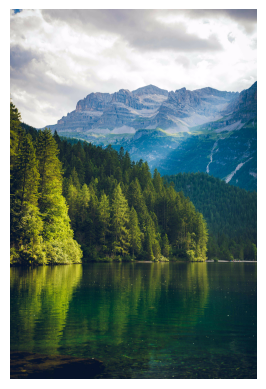

In [1]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def load_image_from_url(url):
    """Load an image from a URL."""
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape[:2]
    out = []
    for i in range(0, h, block_size):
        row = []
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            row.append(func(block))
        out.append(row)
    return out

def zigzag_order(block):
    """Perform zig-zag scanning on an 8x8 block."""
    indices = np.array([
        (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 2),
        (2, 1), (3, 0), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4), (0, 5),
        (1, 4), (2, 3), (3, 2), (4, 1), (5, 0), (6, 0), (5, 1), (4, 2),
        (3, 3), (2, 4), (1, 5), (0, 6), (0, 7), (1, 6), (2, 5), (3, 4),
        (4, 3), (5, 2), (6, 1), (7, 0), (7, 1), (6, 2), (5, 3), (4, 4),
        (3, 5), (2, 6), (1, 7), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3),
        (7, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (4, 7), (5, 6),
        (6, 5), (7, 4), (7, 5), (6, 6), (5, 7), (6, 7), (7, 6), (7, 7)
    ])
    return np.array([block[i, j] for i, j in indices])

def inverse_zigzag_order(coeffs):
    """Reconstruct an 8x8 block from zig-zag scanned coefficients."""
    indices = [
        (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 2),
        (2, 1), (3, 0), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4), (0, 5),
        (1, 4), (2, 3), (3, 2), (4, 1), (5, 0), (6, 0), (5, 1), (4, 2),
        (3, 3), (2, 4), (1, 5), (0, 6), (0, 7), (1, 6), (2, 5), (3, 4),
        (4, 3), (5, 2), (6, 1), (7, 0), (7, 1), (6, 2), (5, 3), (4, 4),
        (3, 5), (2, 6), (1, 7), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3),
        (7, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (4, 7), (5, 6),
        (6, 5), (7, 4), (7, 5), (6, 6), (5, 7), (6, 7), (7, 6), (7, 7)
    ]
    block = np.zeros((8, 8))
    for idx, (i, j) in enumerate(indices):
        block[i, j] = coeffs[idx]
    return block

def simple_jpeg_encoder(input_image, scale_factor=1):
    """JPEG encoder with scaling matrix and zig-zag formatting."""
    ycbcr_image = rgb_to_ycbcr(input_image)
    Y, Cb, Cr = cv2.split(ycbcr_image)

    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))

    # Define scaled quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]) * scale_factor

    # Apply DCT, quantization, and zigzag
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        quantized = np.round(dct_block / q_matrix)
        return zigzag_order(quantized).astype(np.int16).tobytes()  # Binary format

    Y_encoded = block_processing(Y, 8, encode_block)
    Cb_encoded = block_processing(Cb, 8, encode_block)
    Cr_encoded = block_processing(Cr, 8, encode_block)

    return Y_encoded, Cb_encoded, Cr_encoded, scale_factor

def simple_jpeg_decoder(encoded_image):
    """JPEG decoder with scaling matrix and zig-zag formatting."""
    Y_encoded, Cb_encoded, Cr_encoded, scale_factor = encoded_image

    # Define scaled quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]) * scale_factor

    # Dequantize and inverse DCT
    def decode_block(binary_block):
        zigzag_coeffs = np.frombuffer(binary_block, dtype=np.int16)
        dequant_block = inverse_zigzag_order(zigzag_coeffs) * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')

    Y_decoded = np.block([[decode_block(b) for b in row] for row in Y_encoded])
    Cb_decoded = np.block([[decode_block(b) for b in row] for row in Cb_encoded])
    Cr_decoded = np.block([[decode_block(b) for b in row] for row in Cr_encoded])

    # Upsample Cb and Cr
    Cb = cv2.resize(Cb_decoded, (Y_decoded.shape[1], Y_decoded.shape[0]))
    Cr = cv2.resize(Cr_decoded, (Y_decoded.shape[1], Y_decoded.shape[0]))

    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y_decoded, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# URL for image
url = "https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg"
image = load_image_from_url(url)

# Encode with scaling factor
encoded_image = simple_jpeg_encoder(image, scale_factor=1.5)

# Decode the image
decoded_image = simple_jpeg_decoder(encoded_image)

# Display the decoded image
plt.imshow(decoded_image)
plt.axis('off')
plt.show()


Updated Code 

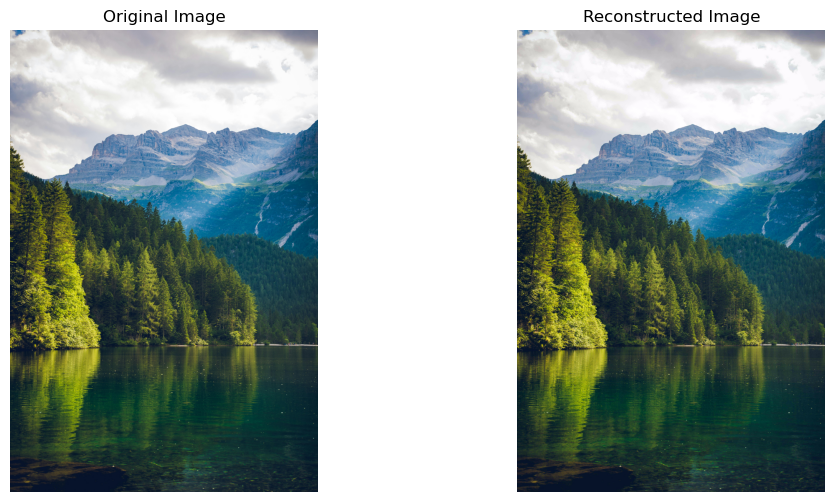

In [5]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def load_image_from_url(url):
    """Load an image from a URL."""
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return np.array(image)

def rgb_to_ycbcr(image):
    """Convert RGB image to YCbCr."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

def ycbcr_to_rgb(image):
    """Convert YCbCr image to RGB."""
    return cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)

def block_processing(image, block_size, func):
    """Apply a function to each block of the image."""
    h, w = image.shape[:2]
    out = []
    for i in range(0, h, block_size):
        row = []
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            row.append(func(block))
        out.append(row)
    return out

def zigzag_order(block):
    """Perform zig-zag scanning on an 8x8 block."""
    indices = np.array([
        (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 2),
        (2, 1), (3, 0), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4), (0, 5),
        (1, 4), (2, 3), (3, 2), (4, 1), (5, 0), (6, 0), (5, 1), (4, 2),
        (3, 3), (2, 4), (1, 5), (0, 6), (0, 7), (1, 6), (2, 5), (3, 4),
        (4, 3), (5, 2), (6, 1), (7, 0), (7, 1), (6, 2), (5, 3), (4, 4),
        (3, 5), (2, 6), (1, 7), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3),
        (7, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (4, 7), (5, 6),
        (6, 5), (7, 4), (7, 5), (6, 6), (5, 7), (6, 7), (7, 6), (7, 7)
    ])
    return np.array([block[i, j] for i, j in indices])

def inverse_zigzag_order(coeffs):
    """Reconstruct an 8x8 block from zig-zag scanned coefficients."""
    indices = [
        (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 2),
        (2, 1), (3, 0), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4), (0, 5),
        (1, 4), (2, 3), (3, 2), (4, 1), (5, 0), (6, 0), (5, 1), (4, 2),
        (3, 3), (2, 4), (1, 5), (0, 6), (0, 7), (1, 6), (2, 5), (3, 4),
        (4, 3), (5, 2), (6, 1), (7, 0), (7, 1), (6, 2), (5, 3), (4, 4),
        (3, 5), (2, 6), (1, 7), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3),
        (7, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (4, 7), (5, 6),
        (6, 5), (7, 4), (7, 5), (6, 6), (5, 7), (6, 7), (7, 6), (7, 7)
    ]
    block = np.zeros((8, 8))
    for idx, (i, j) in enumerate(indices):
        block[i, j] = coeffs[idx]
    return block

def simple_jpeg_encoder(input_image, scale_factor=1):
    """JPEG encoder with scaling matrix and zig-zag formatting."""
    ycbcr_image = rgb_to_ycbcr(input_image)
    Y, Cb, Cr = cv2.split(ycbcr_image)

    # Downsample Cb and Cr
    Cb = cv2.resize(Cb, (Cb.shape[1] // 2, Cb.shape[0] // 2))
    Cr = cv2.resize(Cr, (Cr.shape[1] // 2, Cr.shape[0] // 2))

    # Define scaled quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]) * scale_factor

    # Apply DCT, quantization, and zigzag
    def encode_block(block):
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        quantized = np.round(dct_block / q_matrix)
        return zigzag_order(quantized).astype(np.int16).tobytes()  # Binary format

    Y_encoded = block_processing(Y, 8, encode_block)
    Cb_encoded = block_processing(Cb, 8, encode_block)
    Cr_encoded = block_processing(Cr, 8, encode_block)

    return Y_encoded, Cb_encoded, Cr_encoded, scale_factor

def simple_jpeg_decoder(encoded_image):
    """JPEG decoder with scaling matrix and zig-zag formatting."""
    Y_encoded, Cb_encoded, Cr_encoded, scale_factor = encoded_image

    # Define scaled quantization matrix
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]) * scale_factor

    # Dequantize and inverse DCT
    def decode_block(binary_block):
        zigzag_coeffs = np.frombuffer(binary_block, dtype=np.int16)
        dequant_block = inverse_zigzag_order(zigzag_coeffs) * q_matrix
        return idct(idct(dequant_block.T, norm='ortho').T, norm='ortho')

    Y_decoded = np.block([[decode_block(b) for b in row] for row in Y_encoded])
    Cb_decoded = np.block([[decode_block(b) for b in row] for row in Cb_encoded])
    Cr_decoded = np.block([[decode_block(b) for b in row] for row in Cr_encoded])

    # Upsample Cb and Cr
    Cb = cv2.resize(Cb_decoded, (Y_decoded.shape[1], Y_decoded.shape[0]))
    Cr = cv2.resize(Cr_decoded, (Y_decoded.shape[1], Y_decoded.shape[0]))

    # Combine Y, Cb, and Cr into an RGB image
    ycbcr_image = cv2.merge((Y_decoded, Cb, Cr))
    output_image = ycbcr_to_rgb(np.clip(ycbcr_image, 0, 255).astype(np.uint8))
    return output_image

# URL for image
url = "https://images.pexels.com/photos/1666021/pexels-photo-1666021.jpeg?cs=srgb&dl=conifers-daylight-environment-1666021.jpg&fm=jpg"
image = load_image_from_url(url)

# Encode with scaling factor
encoded_image = simple_jpeg_encoder(image, scale_factor=1.5)

# Decode the image
decoded_image = simple_jpeg_decoder(encoded_image)

# Display both original and decoded images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(decoded_image)
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()